<a href="https://colab.research.google.com/github/a-donat/Data-Science-Portfolio/blob/master/Covid19_Detection_Using_X_ray_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 : Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# TASK 2 : Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 24.65 MiB/s, done.
Updating files: 100% (2295/2295), done.


In [4]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"

#set the path to the train dir
train_dir = os.path.join(main_dir, "train")

#set the path to the test dir
test_dir = os.path.join(main_dir, "test")

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, "COVID19")

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, "NORMAL")

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, "COVID19")

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [6]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(302).jpg', 'COVID19(147).jpg', 'COVID19(116).jpg', 'COVID19(92).jpg', 'COVID19(46).jpg', 'COVID19(418).jpg', 'COVID-19 (173).jpg', 'COVID19(300).jpg', 'COVID19(351).jpg', 'COVID19(16).jpg']
['NORMAL(1068).jpg', 'NORMAL(62).jpg', 'NORMAL(103).jpg', 'NORMAL(948).jpg', 'NORMAL(317).jpg', 'NORMAL(436).jpg', 'NORMAL(1115).jpg', 'NORMAL(978).jpg', 'NORMAL(101).jpg', 'NORMAL(1310).jpg']
['COVID19(426).jpg', 'COVID19(164).jpg', 'COVID19(444).jpg', 'COVID19(423).jpg', 'COVID-19 (313).jpg', 'COVID19(216).jpg', 'COVID19(472).jpg', 'COVID19(121).jpg', 'COVID19(464).jpg', 'COVID19(276).jpg']
['NORMAL(1037).jpg', 'NORMAL(310).jpg', 'NORMAL(1537).jpg', 'NORMAL(1434).jpg', 'NORMAL(833).jpg', 'NORMAL(934).jpg', 'NORMAL(1453).jpg', 'NORMAL(826).jpg', 'NORMAL(1301).jpg', 'NORMAL(1282).jpg']


In [7]:
#print the total no of images present in each dir
print("train", len(train_covid_names) + len(train_normal_names))
print("test", len(test_covid_names) + len(test_normal_names))

train 1811
test 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(302).jpg', '/content/datasets/Data/train/COVID19/COVID19(147).jpg', '/content/datasets/Data/train/COVID19/COVID19(116).jpg', '/content/datasets/Data/train/COVID19/COVID19(92).jpg', '/content/datasets/Data/train/COVID19/COVID19(46).jpg', '/content/datasets/Data/train/COVID19/COVID19(418).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (173).jpg', '/content/datasets/Data/train/COVID19/COVID19(300).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1068).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(62).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(103).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(948).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(317).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(436).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1115).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(978).jpg']


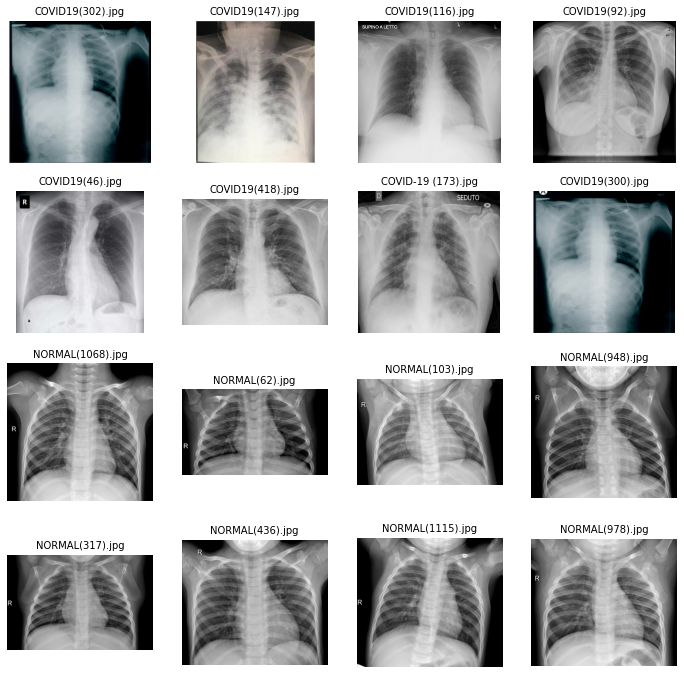

In [13]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, fn) for fn in train_covid_names][:8]
normal_pic = [os.path.join(train_normal_dir, fn) for fn in train_normal_names][:8]

#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split("/", 6)[6]
  sp = plt.subplot(rows, cols, i+1)
  sp.axis("Off")
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap="gray")
plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [14]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale=1./255, 
                                validation_split=0.2, 
                                zoom_range=0.2, 
                                horizontal_flip=True)
dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    subset="training", 
    batch_size=32,
    class_mode = "binary")

validation_generator = dgen_train.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    subset="validation", 
    batch_size=32,
    class_mode = "binary")

test_generator = dgen_train.flow_from_directory(
    test_dir, 
    target_size=(150, 150), 
    batch_size=32,
    class_mode = "binary")

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [15]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [16]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [17]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32, (5, 5), padding="SAME", activation="relu", 
                 input_shape=(150, 150, 3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# place a dropout layer
model.add(Dropout(0.5))

# add another convolutional layer
model.add(Conv2D(64, (5, 5), padding="SAME", activation="relu"))
# pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation="relu"))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# TASK 6 : Compile & Train the Model

In [18]:
#compile the model
model.compile(Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
#train the model
history = model.fit(train_generator, 
                    epochs=30, 
                    validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 56s 1s/step - loss: 0.6252 - accuracy: 0.7874 - val_loss: 0.3152 - val_accuracy: 0.9144
Epoch 2/30
46/46 [==============================] - 44s 955ms/step - loss: 0.2200 - accuracy: 0.9130 - val_loss: 0.1837 - val_accuracy: 0.9365
Epoch 3/30
46/46 [==============================] - 44s 954ms/step - loss: 0.1564 - accuracy: 0.9476 - val_loss: 0.1315 - val_accuracy: 0.9641
Epoch 4/30
46/46 [==============================] - 44s 952ms/step - loss: 0.1289 - accuracy: 0.9558 - val_loss: 0.1091 - val_accuracy: 0.9613
Epoch 5/30
46/46 [==============================] - 43s 942ms/step - loss: 0.1483 - accuracy: 0.9538 - val_loss: 0.2193 - val_accuracy: 0.9116
Epoch 6/30
46/46 [==============================] - 45s 992ms/step - loss: 0.1296 - accuracy: 0.9545 - val_loss: 0.1463 - val_accuracy: 0.9475
Epoch 7/30
46/46 [==============================] - 43s 946ms/step - loss: 0.1141 - accuracy: 0.9620 - val_loss: 0.1441 - val_accuracy: 0.9448
Ep

# TASK 7 : Performance Evaluation

In [20]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epoch')

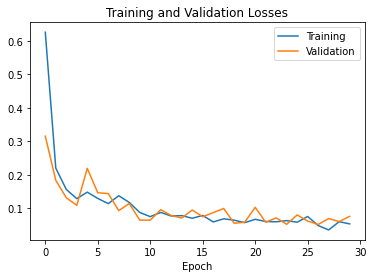

In [21]:
#plot graph between training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training", "Validation"])
plt.title("Training and Validation Losses")
plt.xlabel("Epoch")

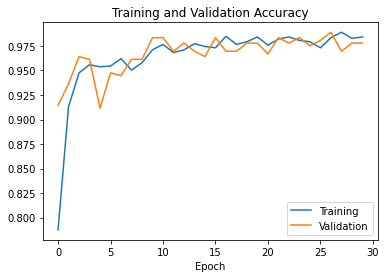

In [22]:
#plot graph between training and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training", "Validation"])
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.show()

In [23]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print("test loss :{} test acc :{}".format(test_loss, test_acc))

16/16 [==============================] - 11s 712ms/step - loss: 0.1311 - accuracy: 0.9504
test loss :0.13105762004852295 test acc :0.9504132270812988


# TASK 8 : Prediction On New Data

In [24]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = "/content/" + filename
  img = image.load_img(img_path, target_size=(150, 150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  
  print(filename)

  if prediction == 0:
    print("covid detected")
  else:
    print("your report is normal")